# Classificação de Textos usando Pipeline do Sklearn 👷

Seja bem-vinde a este notebook que trabalha o dataset sobre a classificação de manchetes no que diz respeito a serem clickbait ou não! O intuito principal apresentado aqui é trabalhar a construção de um Pipeline. Para isso, será feita uma rápida análise inicialmente, para, posteriormente serem construídas WordClouds e o Pipeline, seguido de suas respectivas métricas.

No que diz respeito ao dataset, ele pode ser encontrado [aqui](https://www.kaggle.com/amananandrai/clickbait-dataset) para download.

Caso deseje entender um pouco mais sobre esses assuntos, ou sobre outros ramos de IA, recomendo que busque informações no Turing Talks, blog de informações relacionadas à IA do Turing USP: [Turing Talks](https://medium.com/turing-talks).

Para começar nosso notebook, fiz sua divisão nas etapas a seguir:


**SUMÁRIO:**
1. Importação das bibliotecas;
2. Importação do dataset;
3. Observações iniciais;
4. Análise rápida dos dados;
5. Construção do Pipeline;
6. Métricas.

As informações do dataset podem ser vistas a seguir:


**INFORMAÇÕES DO DATASET:**

* **headline**: contém manchetes de sites de notícias em formato de texto;
* **clickbait**: contém rótulos numéricos, dos quais 1 representa clickbait e 0 representa não-clickbait.

#1. Importação das bibliotecas 📚

In [1]:
#para operações básicas
import pandas as pd 

#para observação
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#para montar o pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#para as métricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#2. Importação do dataset  💾

In [2]:
df = pd.read_csv('clickbait_data.csv')

#3. Observações Iniciais 🧐

In [3]:
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


#4. Análise rápida dos Dados 🎲

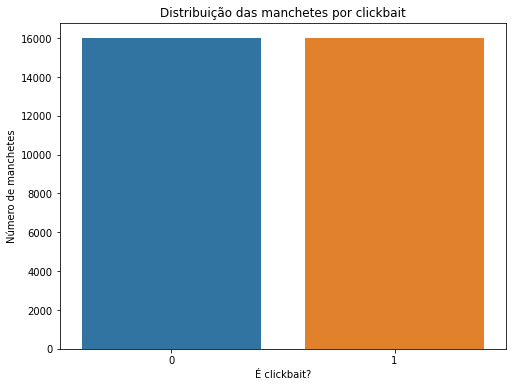

In [5]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'clickbait', data = df)
plt.ylabel('Número de manchetes')
plt.xlabel('É clickbait?')
plt.title('Distribuição das manchetes por clickbait')
plt.show()

Percebemos que a distribuição entre manchetes que são clickbait e que não são é bem similar, o que é favorável à construção do Pipeline, possibilitando a observação de todas as métricas ao final.

##4.1 Montagem da WordCloud

In [6]:
def WordNuvem(df_series): 
    '''
    Concatena todos os textos do DataSeries e produz um WordCloud dos resultados
    '''
    text = df_series.sum()
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

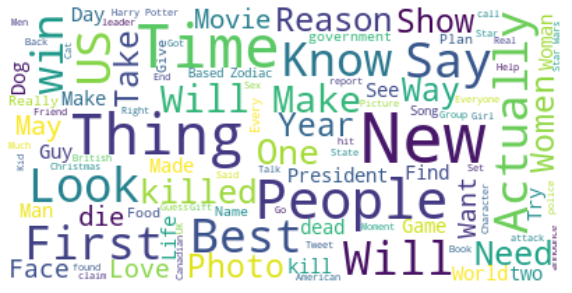

In [7]:
#wordcloud de todas as manchetes
WordNuvem(df['headline'])

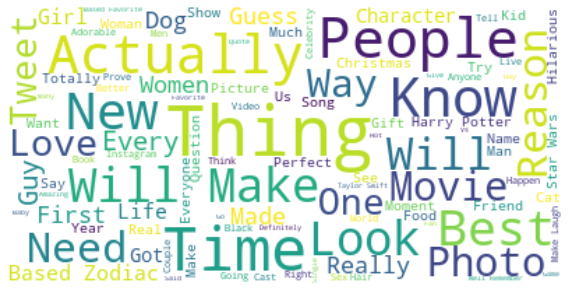

In [8]:
#manchetes que são clickbait
df_clickbait = df[df['clickbait'] == 1]
WordNuvem(df_clickbait['headline'])

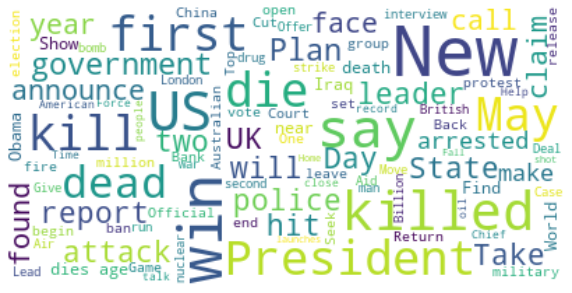

In [9]:
# manchetes que não são clickbait
df_nclickbait = df[df['clickbait'] == 0]
WordNuvem(df_nclickbait['headline'])

#5. Construção do Pipeline 🔧

##5.1 Separando o dataset

In [10]:
# separação entre treino e teste
X = df['headline']
y = df['clickbait']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##5.2 Montando o Pipeline

In [11]:
model = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB(fit_prior=False))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#6. Métricas 📏

In [12]:
def resultados(y_test, y_pred):
    '''
    Evidencia métricas do modelo e mostra 
    '''
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Acurácia: {acc} \n F1: {f1} \n Precisão: {precision} \n Recall: {recall}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

Acurácia: 0.968375 
 F1: 0.969477620943419 
 Precisão: 0.9530360531309298 
 Recall: 0.9864964399705377


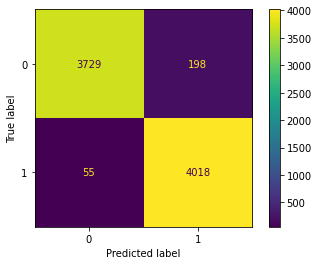

In [13]:
resultados(y_test, y_pred)